# Python Example <a id ="10"></a>
Now we will use k-means clustering algorithm on [mall customer unlabeled data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) to create groups of the customer based on annual spending and spending score assigned by the mall.


## Import The Library <a id ="11"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load Data <a id ="12"></a>
* We are going to use ‘Mall_Customers.csv’ CSV file
* Dataset contains 5 columns CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [2]:
df = pd.read_csv('/content/Mall_Customers.xls')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Understanding The Data <a id ="13"></a>
* There are total 200 training example without any label to indicate which customer belong which group
* We are going to use annual income and spending score to find the clusters in data. Note that spending score is from 1 to 100 which is assigned by the mall based on customer behavior and spending nature 

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

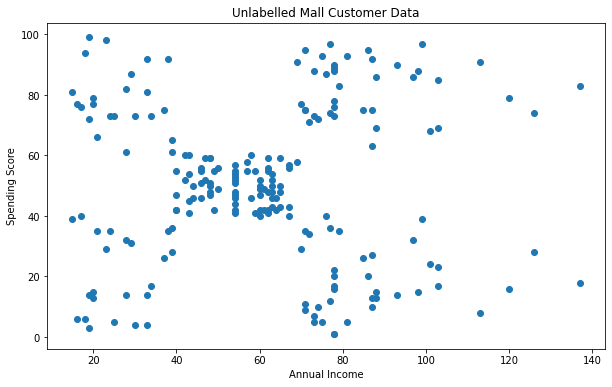

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [4]:
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
X = df.iloc[:, [3,4]].values
X[:5] # Show first 5 records only

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Choosing The Number of Clusters <a id ="14"></a>
By visual inspection of above scatter plot, we can identify 5 possible clusters. But since there is no other information available its very difficult say it with 100% confidence. So lets try to verify this with Elbow method technique.

### Elbow Method <a id ="15"></a>
* Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
* We will use 'random' initialization method for this study.
* Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

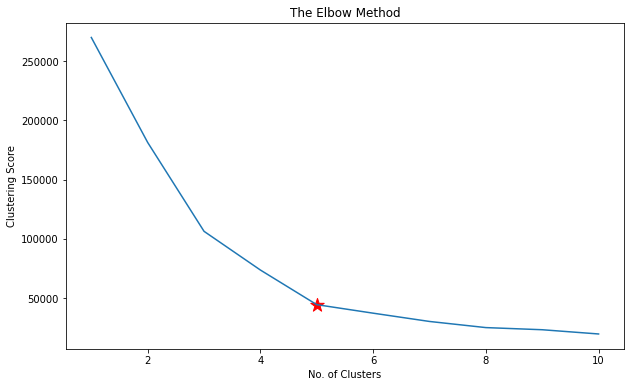

In [5]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

From above elbow plot its clear that clustering scores slows down after 5 number of clusters. So we can use K= 5 for further analysis.

## Compute K-Means Clustering <a id ="16"></a>
Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [6]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
# Compute k-means clustering
kmeans.fit(X)
# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)
pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

'pred' contains the values index( 0 to 4) cluster for every training example. Let's add it to original dataset for better understanding.

In [7]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


Text(0.5, 1.0, 'Customer Clusters')

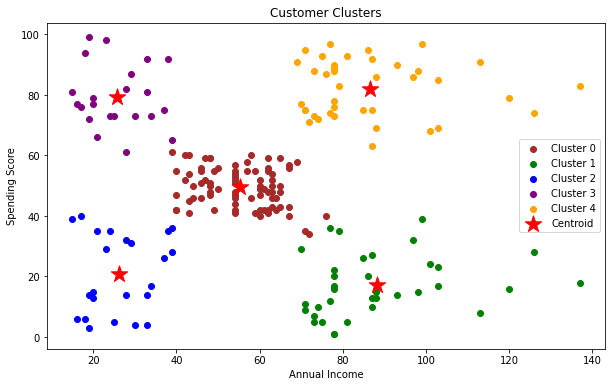

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cf_matrix = confusion_matrix(df['Cluster'],kmeans.labels_)
print(cf_matrix)

[[81  0  0  0  0]
 [ 0 35  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0 22  0]
 [ 0  0  0  0 39]]


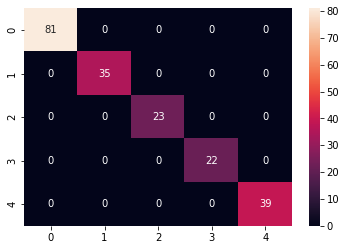

In [15]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)